<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/Randomforest_healthcare_dataset_stroke_data_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the uploaded dataset
df  = pd.read_csv('/content/drive/My Drive/randomforest/healthcare-dataset-stroke-data.csv')


# Display basic information and the first few rows of the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(None,
       id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  )

**Dataset Loaded: Stroke Prediction**

This dataset has 5,110 records and 12 columns. Here's a quick overview:

 Features:
Categorical: gender, ever_married, work_type, Residence_type, smoking_status

Numerical: age, avg_glucose_level, bmi

Binary indicators: hypertension, heart_disease

Target Variable: stroke (0 = No stroke, 1 = Stroke)

 Missing Data:
bmi has missing values.

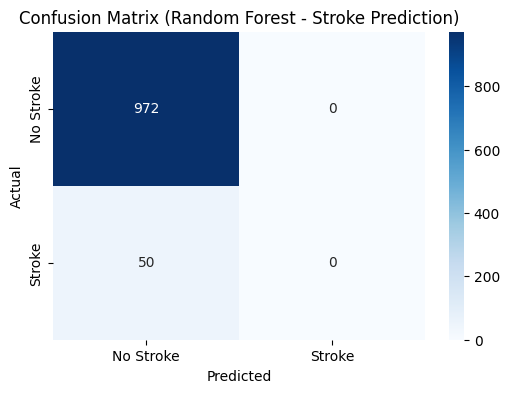

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # Corrected the import statement
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Drop 'id' column
if 'id' in df.columns:
    df.drop(columns='id', inplace=True)

# Fill missing 'bmi' values with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop(columns='stroke')
y = df_encoded['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest with sensible hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict and generate confusion matrix
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - Stroke Prediction)')
plt.show()

**Random Forest Model Trained & Evaluated**

The confusion matrix above shows how well the model performed in predicting stroke vs. no stroke cases:

Top-left (True Negatives): Correctly predicted no-stroke cases

Bottom-right (True Positives): Correctly predicted stroke cases

Top-right (False Positives): Predicted stroke when there wasn't one

Bottom-left (False Negatives): Missed stroke cases (predicted no stroke)

In [11]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for nicer display
report_df = pd.DataFrame(report).transpose()
report_df


,precision,recall,f1-score,support
0,0.951076,1.000000,0.974925,972.000000
1,0.000000,0.000000,0.000000,50.000000
accuracy,0.951076,0.951076,0.951076,0.951076
macro avg,0.475538,0.500000,0.487462,1022.000000
weighted avg,0.904546,0.951076,0.927228,1022.000000


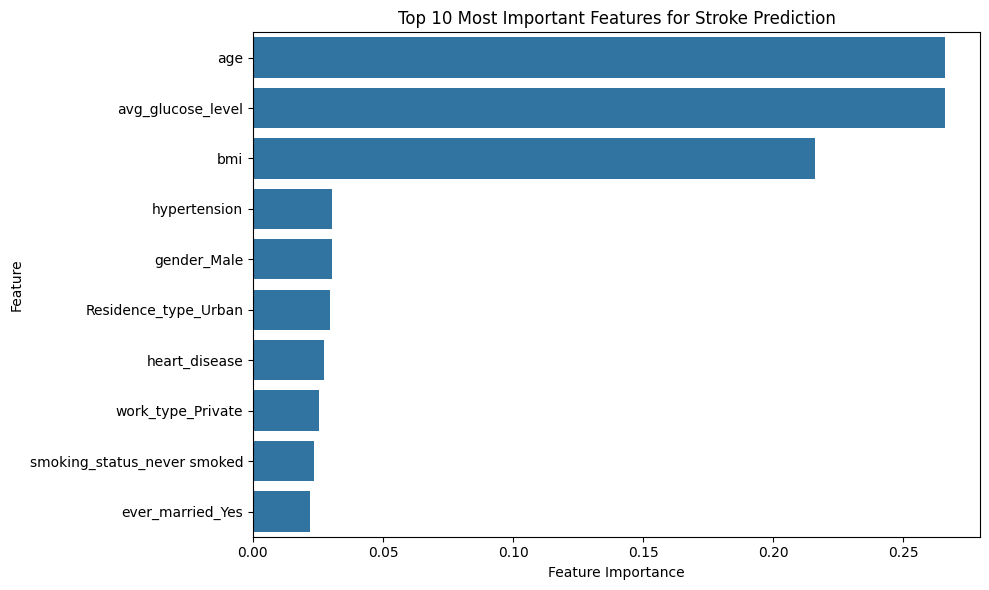

,Feature,Importance
0,age,0.266152
3,avg_glucose_level,0.266015
4,bmi,0.216013
1,hypertension,0.030460
5,gender_Male,0.030357
12,Residence_type_Urban,0.029689
2,heart_disease,0.027394
9,work_type_Private,0.025297
14,smoking_status_never smoked,0.023650
7,ever_married_Yes,0.022083


In [12]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features for Stroke Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

importance_df.head(10)


**Key Insights:**

Age, glucose levels, and BMI are the most critical factors in predicting strokes.

Medical history indicators (like hypertension and heart disease) play smaller, yet meaningful roles.

Socio-demographic features like marital status, gender, and residence type also contribute.

In [13]:
from sklearn.model_selection import GridSearchCV

# Define a simplified parameter grid to speed up tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 48 candidates, totalling 240 fits


({'class_weight': 'balanced',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 np.float64(0.9291715783219798))